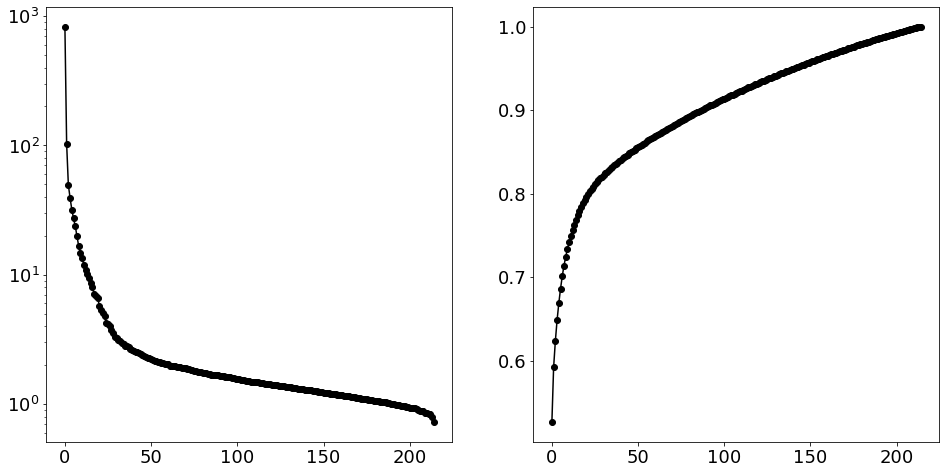

'\nobs = np.loadtxt(os.path.join(\'..\',\'DATA\',\'ovariancancer_obs.csv\'),delimiter=\',\')\n\nf = open(os.path.join(\'..\',\'DATA\',\'ovariancancer_grp.csv\'), "r")\ngrp = f.read().split("\n")\n\nU, S, VT = np.linalg.svd(obs,full_matrices=0)\n\nfig1 = plt.figure()\nax1 = fig1.add_subplot(121)\nax1.semilogy(S,\'-o\',color=\'k\')\nax2 = fig1.add_subplot(122)\nax2.plot(np.cumsum(S)/np.sum(S),\'-o\',color=\'k\')\n\nplt.show()\n'

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

obs =pd.read_csv('ovariancancer_obs.csv',sep=',')
obs=np.array(obs)
U, S, VT = np.linalg.svd(obs,full_matrices=0)


fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

plt.show()
f =pd.read_csv('ovariancancer_grp2.csv',sep=',')
grp=np.array(f)


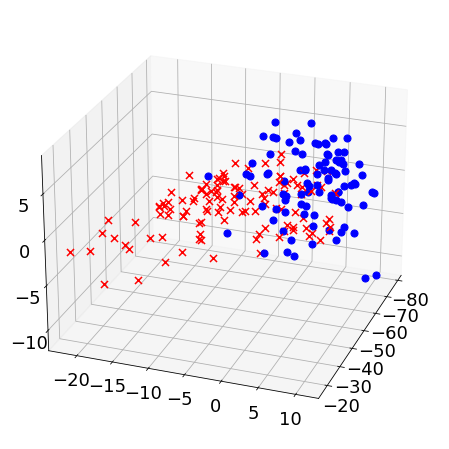

In [26]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T
    z = VT[2,:] @ obs[j,:].T
    
    if grp[j] == 1:
        ax.scatter(x,y,z,marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)

ax.view_init(25,20)
plt.show()

In [27]:


# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')



El set de datos USArrests contiene el porcentaje de asaltos (Assault), asesinatos (Murder) y secuestros (Rape) por cada 100,000 habitantes para cada uno de los 50 estados de USA (1973). Además, también incluye el porcentaje de la población de cada estado que vive en zonas rurales (UrbanPoP)

In [33]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
datos.info()
type(datos)


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


pandas.core.frame.DataFrame

In [30]:


datos.head(4)



,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5


Exploración inicial estadistica

In [31]:


print('----------------------')
print('Media de cada variable')
print('----------------------')
datos.mean(axis=0)



----------------------
Media de cada variable
----------------------


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [32]:


print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)



-------------------------
Varianza de cada variable
-------------------------


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

PCA
https://www.cienciadedatos.net/documentos/py19-pca-python.html#Exploraci%C3%B3n-inicial

In [35]:
d=np.array(datos)[:,0:4]